# Introduction: System Analysis

Once appropriate mathematical models of a system have been obtained, either in state-space or transfer function form, we may then analyze these models to predict how the system will respond in both the time and frequency domains.  To put this in context, control systems are often designed to improve stability, speed of response, steady-state error, or prevent oscillations. In this section, we will show how to determine these dynamic properties from the system models.

## Time Response Overview

The **time response** represents how the state of a dynamic system changes in time when subjected to a particular input.  Since the models we have derived consist of differential equations, some integration must be performed in order to determine the time response of the system.  For some simple systems, a closed-form analytical solution may be available.  However, for most systems, especially nonlinear systems or those subject to complicated input forces, this integration must be carried out numerically.  Fortunately, Python provides many useful resources for calculating time responses for many types of inputs, as we shall see in the following sections. The time response of a linear dynamic system consists of the sum of the **transient response** which depends on the initial conditions and the **steady-state response** which depends on the system input.  These correspond to the free (homogeneous or zero input) and the forced (inhomogeneous or non-zero input) solutions of the governing differential equations respectively.

## Frequency Response Overview

All the examples presented in this tutorial are modeled by linear constant coefficient differential equations and are thus linear time-invariant (LTI). LTI systems have the extremely important property that if the input to the system is sinusoidal, then the steady-state output will also be sinusoidal at the same frequency but in general with different magnitude and phase. These magnitude and phase differences as a function of frequency comprise the **frequency response** of the system. The frequency response of a system can be found from the transfer function in the following way: create a vector of frequencies (varying between zero or "DC" to infinity) and compute the value of the plant transfer function at those frequencies. If \\(G(s)\\) is the open-loop transfer function of a system and \\(\omega\\) is the frequency vector, we then plot \\(G(j\omega)\\) versus $\omega$. Since \\(G(j\omega)\\) is a complex number, we can plot both its magnitude and phase (the **Bode Plot**) or its position in the complex plane (the **Nyquist Diagram**). Both methods display the same information in different ways.

## Stability

For our purposes, we will use the *Bounded Input Bounded Output (BIBO)* definition of stability which states that a system is stable if the output remains bounded for all bounded (finite) inputs.  Practically, this means that the system will not “blow up” while in operation. The transfer function representation is especially useful when analyzing system stability.  If all poles of the transfer function (values of s at which the denominator equals zero) have negative real parts, then the system is stable.  If any pole has a positive real part, then the system is unstable.  If we view the poles on the complex s-plane, then all poles must be in the left half plane (LHP) to ensure stability.  If any pair of poles is on the imaginary axis, then the system is marginally stable and the system will oscillate. The poles of a LTI system model can easily be found using `control.pole` command, an example if which is shown below:

In [1]:
import control
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
# Generate Larger more readable plots
sns.set(
    rc={
        "axes.labelsize": 8,
        "axes.titlesize": 8,
        "figure.figsize": (4 * 1.618, 4),  # Golden ratio
        "figure.dpi": 200,
    }
)

In [29]:
# Both of these work for specifying an s.
s = control.TransferFunction.s
s = control.tf([1, 0], 1)

In [30]:
G = 1 / (s ** 2 + 2 * s + 5)
G

TransferFunction(array([1]), array([1., 2., 5.]))

In [31]:
control.pole(G)

array([-1.+2.j, -1.-2.j])

Thus this system is stable since the real parts of the poles are both negative. The stability of a system may also be found from the state-space representation.  In fact, the poles of the transfer function are the eigenvalues of the system matrix A.  We can use the [`numpy.linalg.eig`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) command to calculate the eigenvalues using the system matrix as shown below.

In [32]:
[A, B, C, D] = control.ssdata(G)

In [33]:
w, _ = np.linalg.eig(A)
w

array([-1.+2.j, -1.-2.j])

# System Order

The order of a dynamic system is the order of the highest derivative of its governing differential equation.  Equivalently, it is the highest power of s in the denominator of its transfer function. The important properties of first, second, and higher order systems will be reviewed in this section.

## First Order Systems

First order systems are the simplest dynamic systems to analyze.  Some common examples include cruise control systems and RC circuits. The general form of the first order differential equation is as follows

$$
\dot{y} + a y = b u \quad \textrm{or} \ \quad \tau \dot{y} + y = k_{dc} u
$$

The first order transfer function is

$$
G(s) = \frac{b}{s+a} = \frac{k_{dc}}{\tau s + 1}
$$

### DC Gain

The DC gain, $k_{dc}$, is the ratio of the magnitude of the steady-state step response to the magnitude of the step input. From the **Final Value Theorem**, for stable transfer functions the DC gain is the value of the transfer function when s=0. For first order systems equal to $k_{dc} = b/a$. 

### Time Constant

The time constant \\(T_c = \tau = 1/a\\) is the time it takes for the system to reach 63% of the steady-state value for a step response or to decrease to 37 of the inital value for an impulse response.  More generally, it represents the time scale for which the dynamics of the system are significant. 

### Poles/Zeros

There is a single real pole at $s=-a$.  Therefore, the system is stable if \\(a\\) is positive and unstable if \\(a\\) is negative.  There are no zeros. 

### Step Response 

We can calculate the system time response to a step input of magnitude $u$ using the following commands:

In [34]:
k_dc = 5
tau = 10
u = 2
s = control.tf("s")
G = k_dc / (tau * s + 1)
T, yout = control.step_response(sys=u * G)

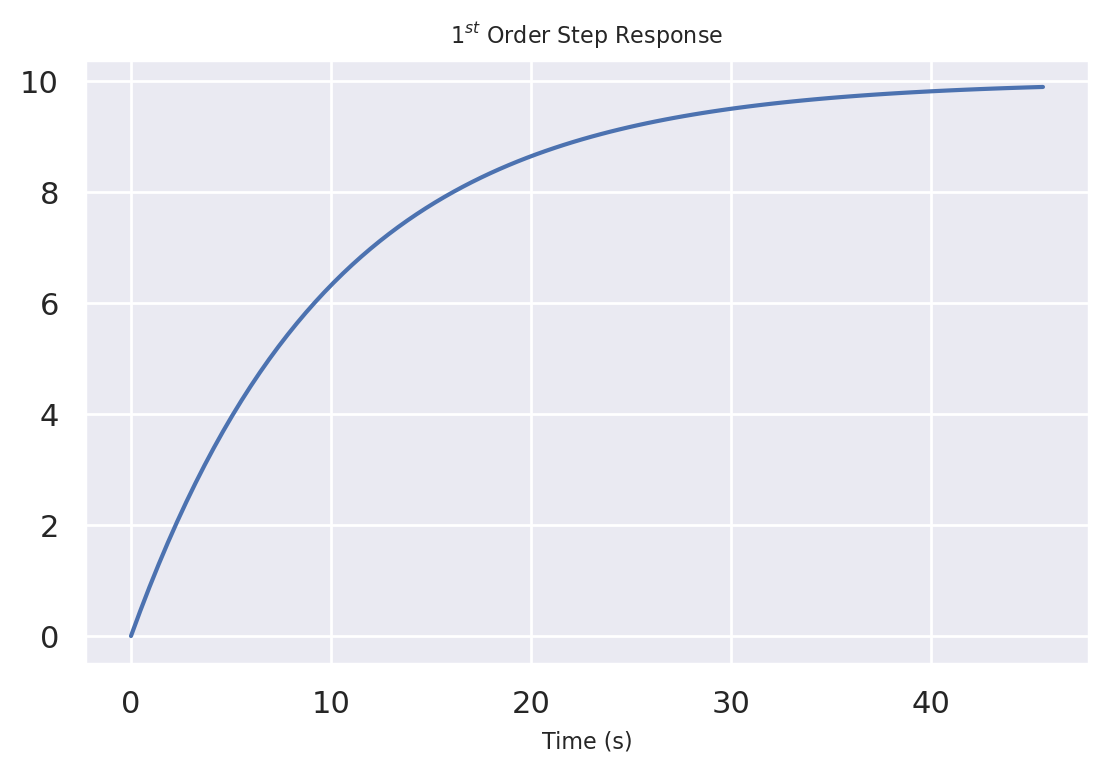

In [40]:
plt.plot(T, yout)
plt.xlabel("Time (s)")
plt.title("$1^{st}$ Order Step Response");

### Settling Time

The settling time, $T_s$, is the time required for the system ouput to fall within a certain percentage (i.e. 2%) of the steady state value for a step input or equivalently to decrease to a certain percentage of the initial value for an impulse input. The settling times for first order system for the most common tolerances are provided in the table below. Note that the tighter the tolerance, the longer the system response takes to settle to within this tolerance, as expected. <html> <table style="border:2px solid black;" align="center" > <tr style="background-color:#EEEEEE; font-weight:bold;"><td>10%</td><td>5%</td><td>2%</td><td>1%</td></tr> <tr><td>Ts=2.3/a=2.3Tc</td><td>Ts=3/a=3Tc</td><td>Ts=3.9/a=3.9Tc</td><td>Ts=4.6/a=4.6Tc</td></tr> </table> </html>

### Rise Time 

The rise time, $T_r$, is the time required for the system output to rise from some lower level x% to some higher level y% of the final steady-state value. For first order systems, the typical range is 10% - 90%. 

### Bode Plots

The Bode Plots show the magnitude and phase of the system frequency response, $G(j\omega)$.  We can generate the Bode plots in using the `control.bode` command.

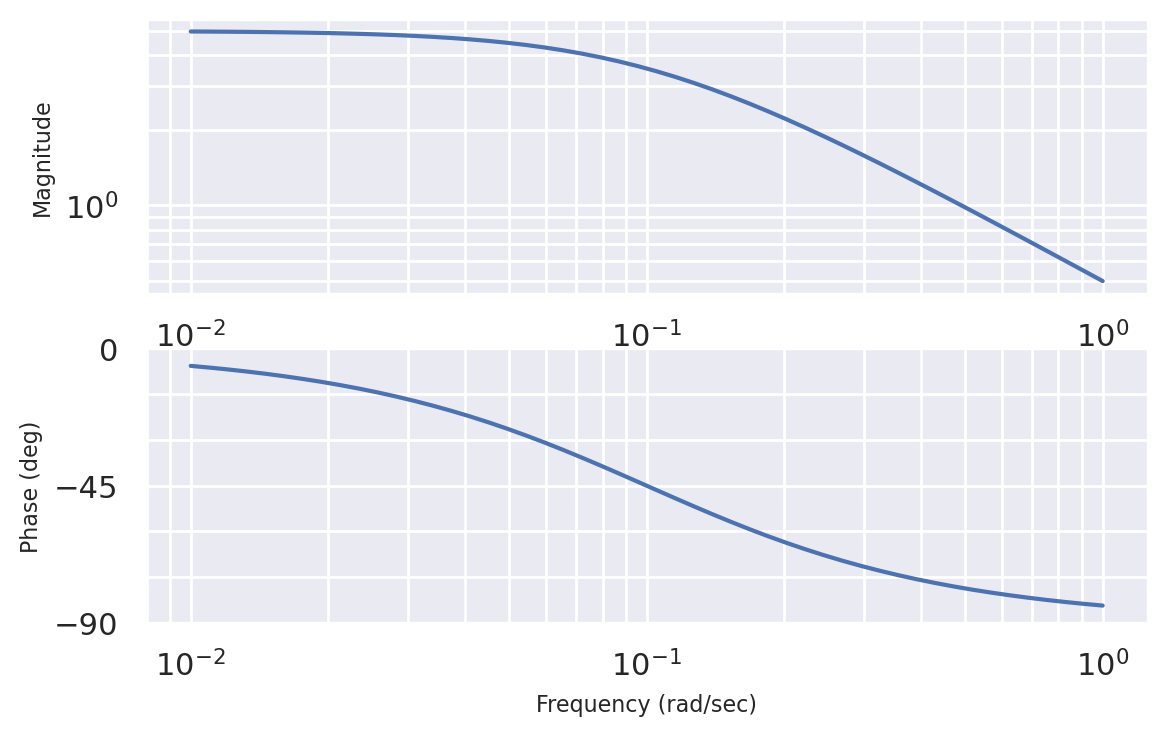

In [41]:
mag, phase, omega = control.bode(G, plot=True)

The Bode plots use a logarithmic frequency scale, so that a larger range of frequencies are visible.  Also, the magnitude is represented using the logarithmic *decibel unit (dB)* defined as:

$$
M_{dB} = 20 \log_{10} (M)
$$

Like frequency, the decibel scale allows us to view a much larger range of magnitudes on a single plot.  Also, as we shall see in subsequent tutorials, when systems are combined or controllers are added, transfer functions are often multiplied together.  Using the dB scale, we may simply add the magnitudes of the transfer functions. Note, we may also add the phase angles though these are not shown on a log scale. The low frequency magnitude of the first order bode plot is $20\log(k_{dc})$. The magnitude plot has a bend at the frequency equal to the absolute value of the pole (ie. $\omega = a$), and then decreases at 20dB for every factor of ten increase in frequency (-20dB/decade).  The phase plot is asymptotic to 0 degrees at low frequency, and asymptotic to -90 degrees at high frequency. Between frequency 0.1a and 10a, the phase changes by approximately -45 degrees for every factor of ten increase in frequency (-45 degrees/decade). We will see in the Frequency Methods for Controller Design Section how to use Bode Plots to calculate closed loop stability and performance of feedback systems.

## Second Order Systems

Second order systems are commonly encountered in practice, and are the simplest type of dynamic system to exhibit oscillations. In fact many real higher order systems are modeled as second order to facilitate analysis. Examples include mass-spring-damper systems and RLC circuits. The general form of the first order differential equation is as follows

$$
m \ddot{y} + b \dot{y} + k y = f(t) \quad \textrm{or} \ \quad \ddot{y} + 2\zeta\omega_n \dot{y} + \omega_n^2 y = k_{dc} \omega_n^2 u
$$

The first order transfer function is

$$
G(s) = \frac{1}{ms^2+bs+k} = \frac{k_{dc} \omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}
$$

#### DC Gain

The DC gain, $k_{dc}$, again is the ratio of the magnitude of the steady-state step response to the magnitude of the step input, and for stable systems it is the value of the transfer function when $s=0$. For second order systems,

$$
k_{dc} = \frac{1}{k}
$$

#### Damping Ratio

The damping ratio is a dimensionless quantity charaterizing the energy losses in the system due to such effects as viscous friction or electrical resistance. From the above definitions,

$$
\zeta = \frac{b}{2 \sqrt{k/m}}
$$

#### Natural Frequency

The natural frequency is the frequency (in rad/s) that the system will oscillate at when there is no damping, $\zeta=0$.

$$
\omega_n = \sqrt{\frac{k}{m}}
$$

#### Poles/Zero

The second order transfer function has two poles at:

$$
s_p = -\zeta \omega_n \pm j \omega_n \sqrt{1-\zeta^2}
$$

### Under Damped System

If $\zeta < 1$, then the system is **under damped**. Both poles are complex valued with negative real parts; therefore the system is stable but oscillates while approaching the steady-state value.

In [43]:
k_dc = 1
w_n = 10
zeta = 0.2
G1 = k_dc * w_n ** 2 / (s ** 2 + 2 * zeta * w_n * s + w_n ** 2)
G1

TransferFunction(array([100]), array([  1.,   4., 100.]))

(array([-2.+9.79795897j, -2.-9.79795897j]), array([], dtype=float64))

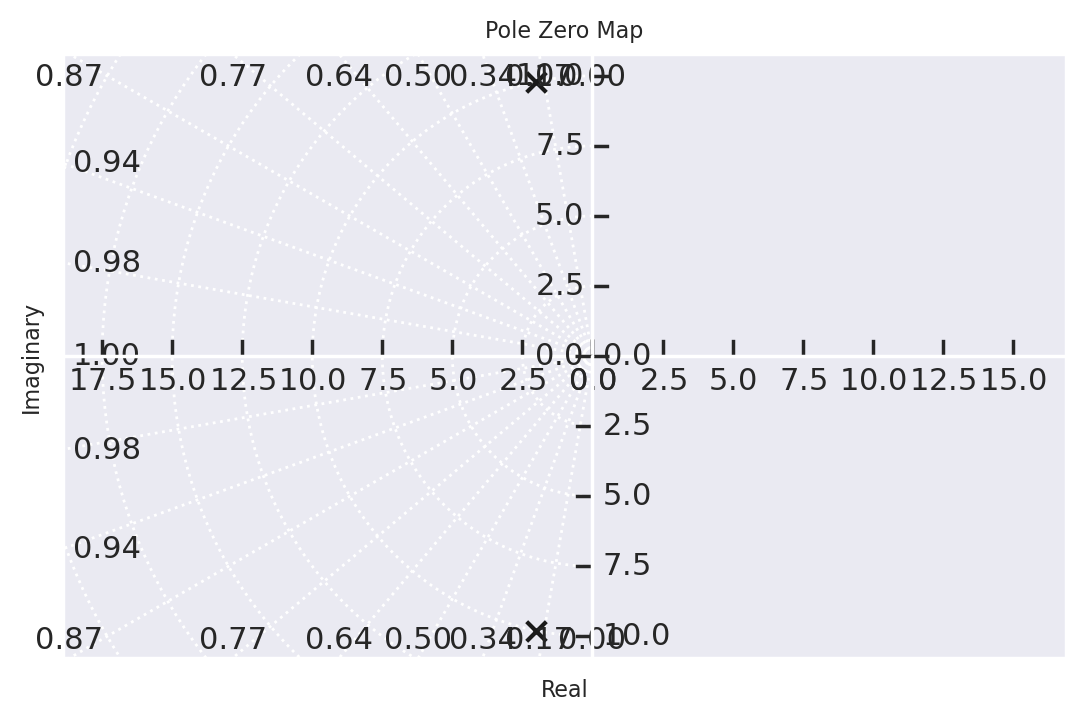

In [12]:
control.pzmap(G1, plot=True, grid=True)

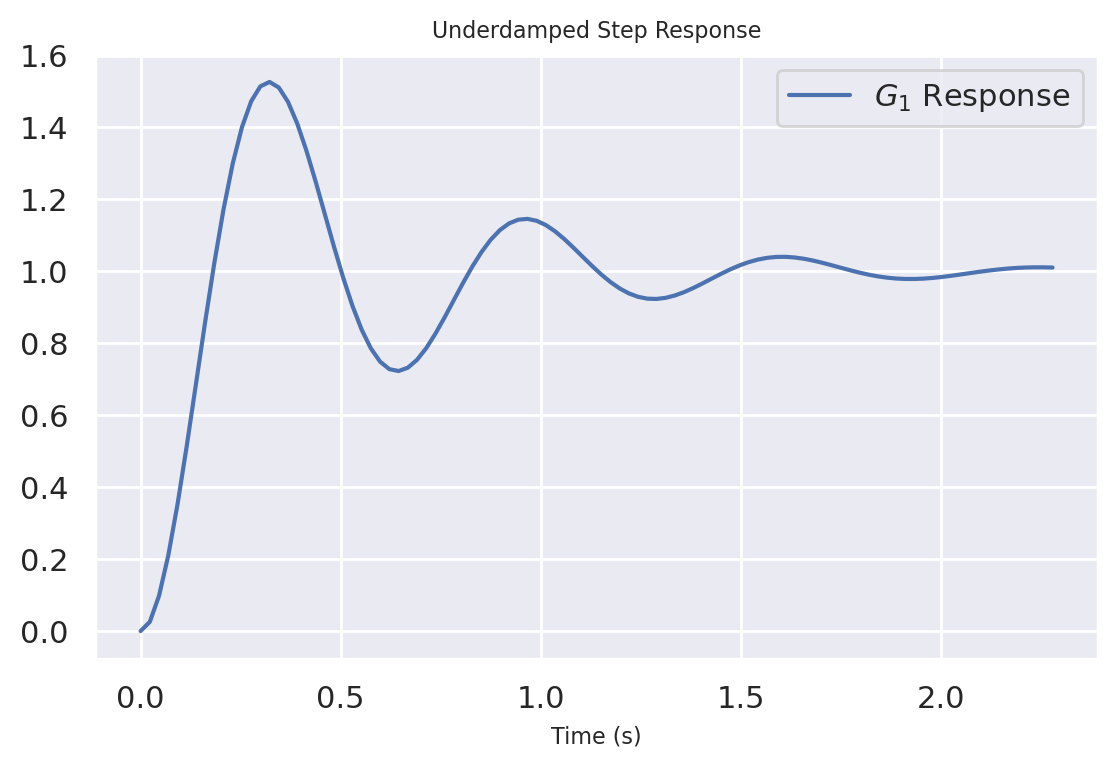

In [45]:
T, yout = control.step_response(sys=G1)
plt.plot(T, yout)
plt.xlabel("Time (s)")
plt.title("Underdamped Step Response")
plt.legend(["$G_1$ Response"])
plt.axis("tight")
plt.grid("on")

#### Settling Time

The settling time, $T_s$, is the time required for the system ouput to fall within a certain percentage of the steady state value for a step input or equivalently to decrease to a certain percentage of the initial value for an impulse input.  For a second order, underdamped system, the settling time can be approximated by the following equation:

$$
T_s = \frac{- \ln(\mathrm{tolerance}\;\mathrm{fraction})}{\zeta \omega_n}
$$

The settling times for the most common tolerances are presented in the following table: 

| Tolerance | Ts                      |
|-----------|-------------------------|
| 10%       | $\frac{2.3}{\zeta w_n}$ |
| 5%        | $\frac{3}{\zeta w_n}$   |
| 2%        | $\frac{3.9}{\zeta w_n}$ |
| 1%        | $\frac{4.6}{\zeta w_n}$ |

#### Percent Overshoot

The percent overshoot is the percent by which a system exceeds its final steady-state value.  For a second order under damped system, the percent overshoot is diretly related to the damping ratio by the following equation:

$$
\%OS = e^{\left( \frac{-\zeta\pi}{\sqrt{1-\zeta^2}} \right)} \cdot 100\
$$

For second order under damped systems, the 2% settling time, $T_s$, rise time, $T_r$, and percent overshoot, %OS, are related to the damping and natural frequency as shown below.

$$
T_s \approx \frac{4.6}{\zeta \omega_n}
$$



$$
T_r \approx \frac{2.2}{\zeta \omega_n}
$$



$$
\zeta = \frac{-\ln(\%OS/100)}{\sqrt{\pi^2+\ln(\%OS/100)^2}}
$$

### Over Damped Systems

If $\zeta > 1$, then the system is **over damped**. Both poles are real and negative; therefore the system is stable and does not oscillate. The step response and a pole-zero map of an over damped system are calculated below:

(array([-18.63324958,  -5.36675042]), array([], dtype=float64))

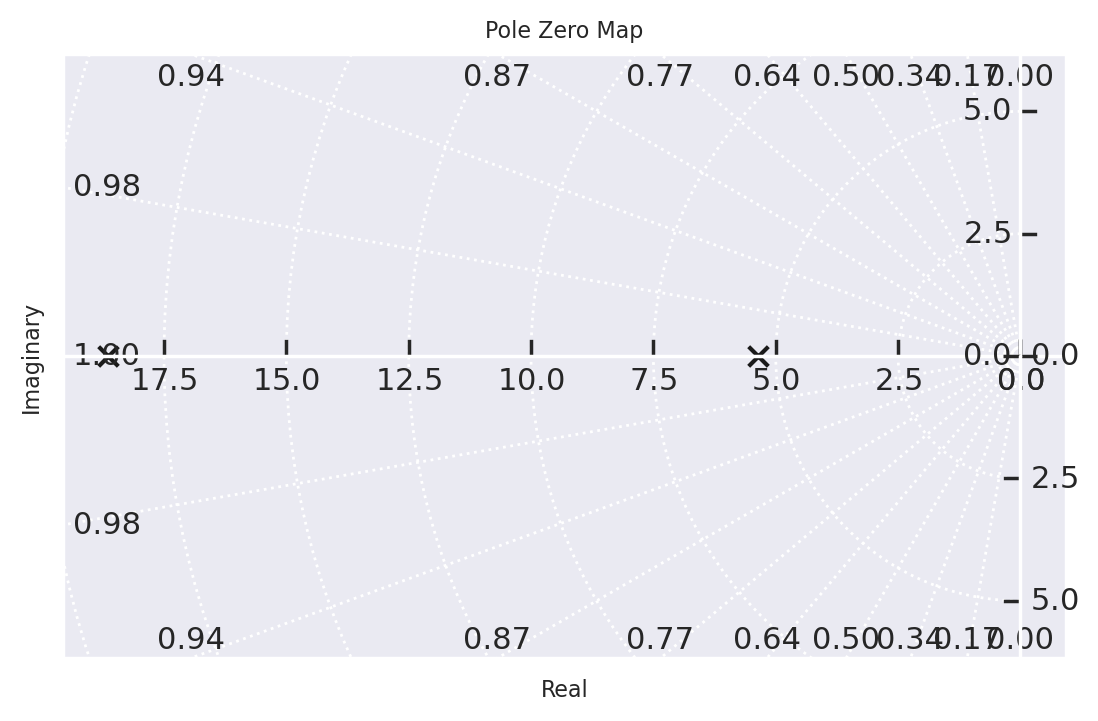

In [46]:
zeta = 1.2
G2 = k_dc * w_n ** 2 / (s ** 2 + 2 * zeta * w_n * s + w_n ** 2)
control
control.pzmap(G2, plot=True, grid=True)

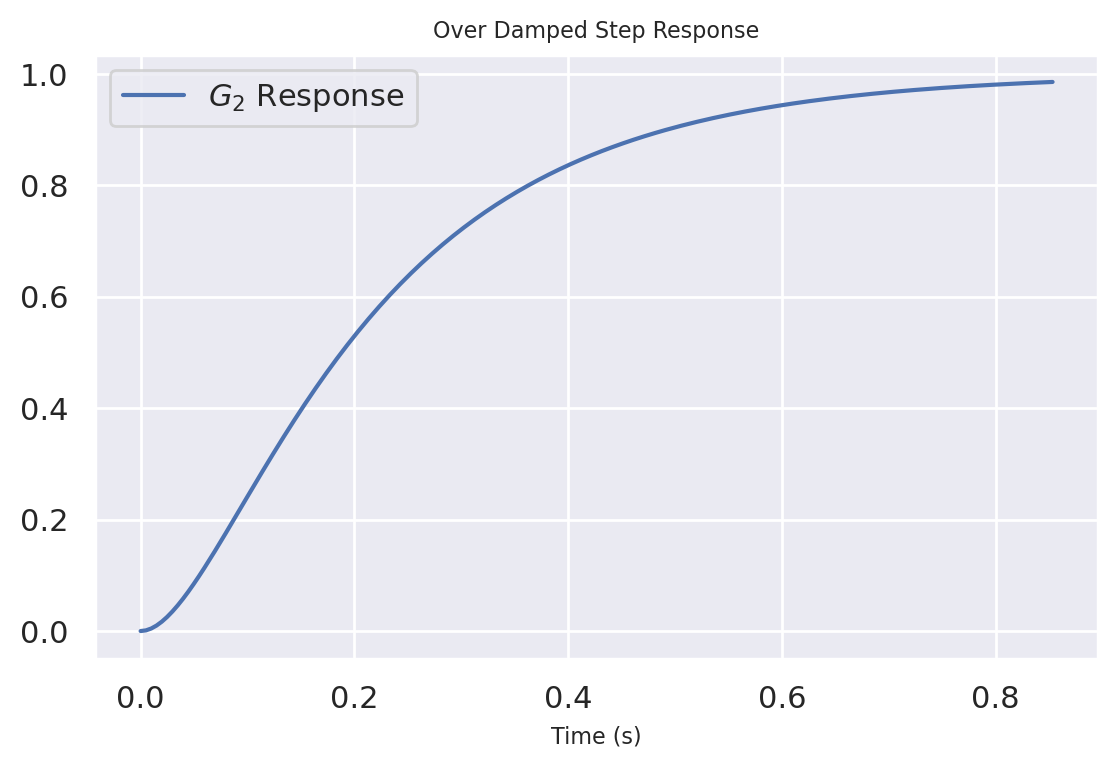

In [47]:
T, yout = control.step_response(sys=G2)
plt.plot(T, yout)
plt.xlabel("Time (s)")
plt.title("Over Damped Step Response")
plt.legend(["$G_2$ Response"])
plt.axis("tight")
plt.grid("on")

#### Critically Damped Systems

If $\zeta = 1$, then the system is **critically damped**. Both poles are real and have the same magnitude, $s_p = -\zeta\omega_n$. Critically damped systems approach steady-state quickest without oscillating. Now change the value of the damping to 1, and replot the step response and pole-zero map.

In [15]:
zeta = 1
G3 = k_dc * w_n ** 2 / (s ** 2 + 2 * zeta * w_n * s + w_n ** 2)
G3

TransferFunction(array([100]), array([  1.,  20., 100.]))

(array([-10., -10.]), array([], dtype=float64))

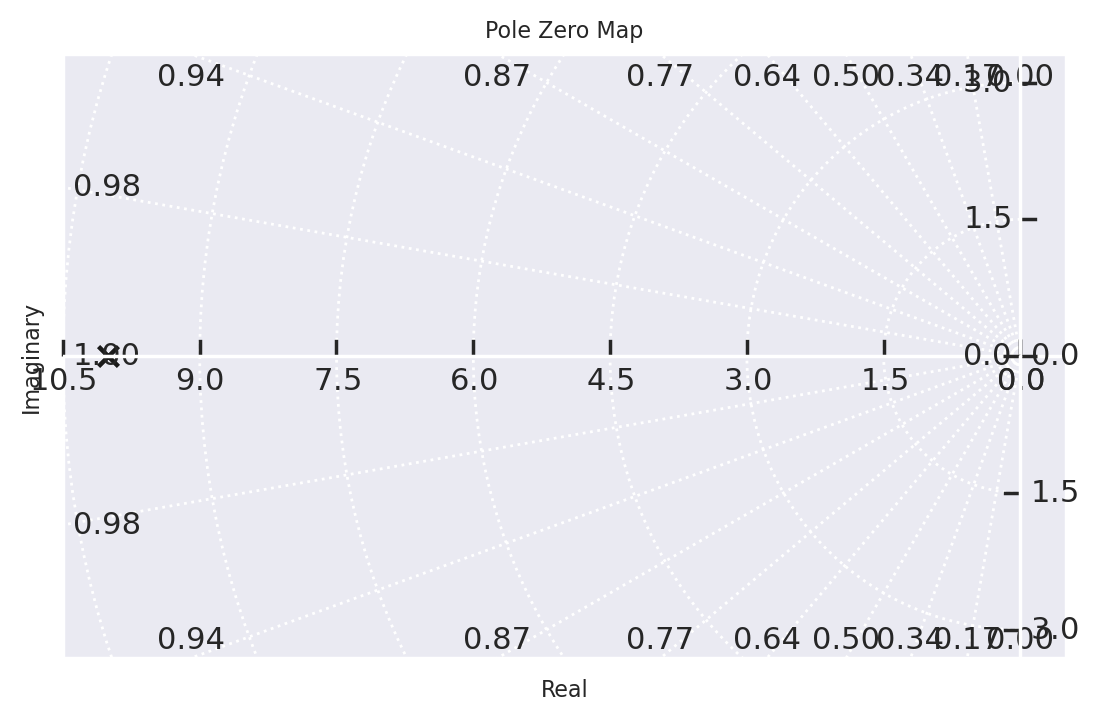

In [16]:
control.pzmap(G3, plot=True, grid=True)

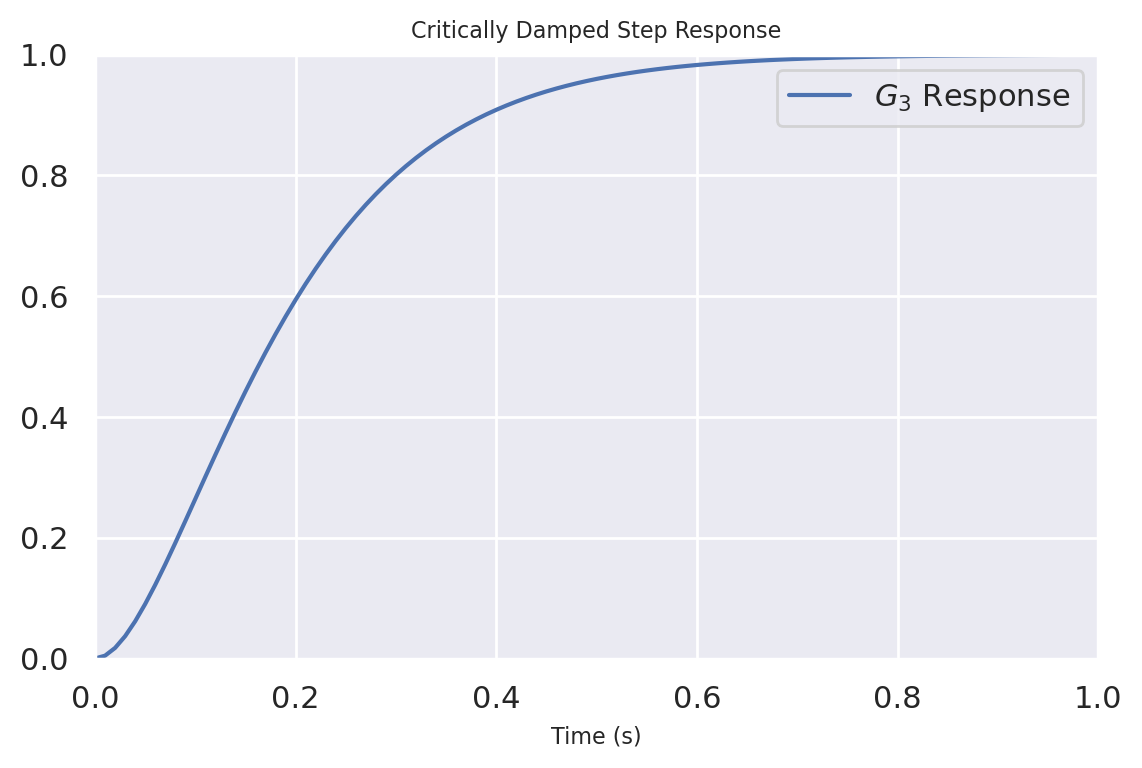

In [49]:
T, yout = control.step_response(sys=G3, T=np.arange(0, 1, 0.01))
plt.plot(T, yout)
plt.xlabel("Time (s)")
plt.title("Critically Damped Step Response")
plt.legend(["$G_3$ Response"])
plt.axis([0, 1, 0, 1])
plt.grid("on")

### Undamped Systems

If $\zeta = 0$, then the system is **undamped**.  In this case, the poles are purely imaginary; therefore the system is marginally stable and oscillates indefinitely.

In [50]:
zeta = 0
G4 = k_dc * w_n ** 2 / (s ** 2 + 2 * zeta * w_n * s + w_n ** 2)
G

TransferFunction(array([5]), array([10.,  1.]))

(array([-0.+10.j,  0.-10.j]), array([], dtype=float64))

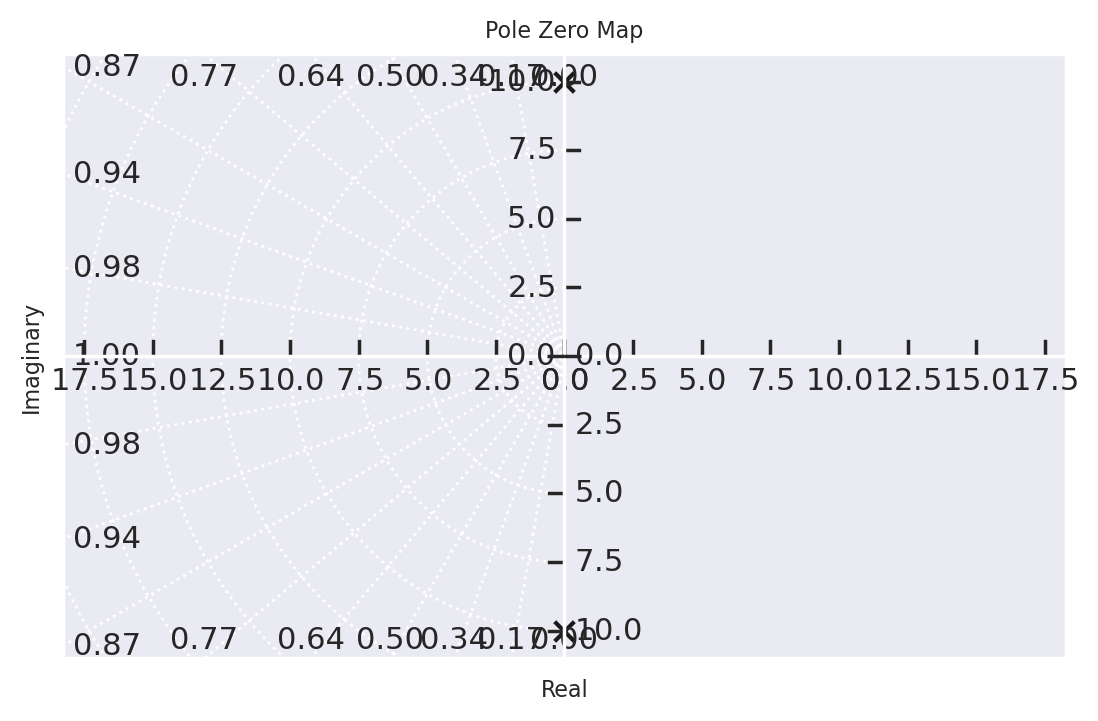

In [51]:
control.pzmap(G4, plot=True, grid=True)

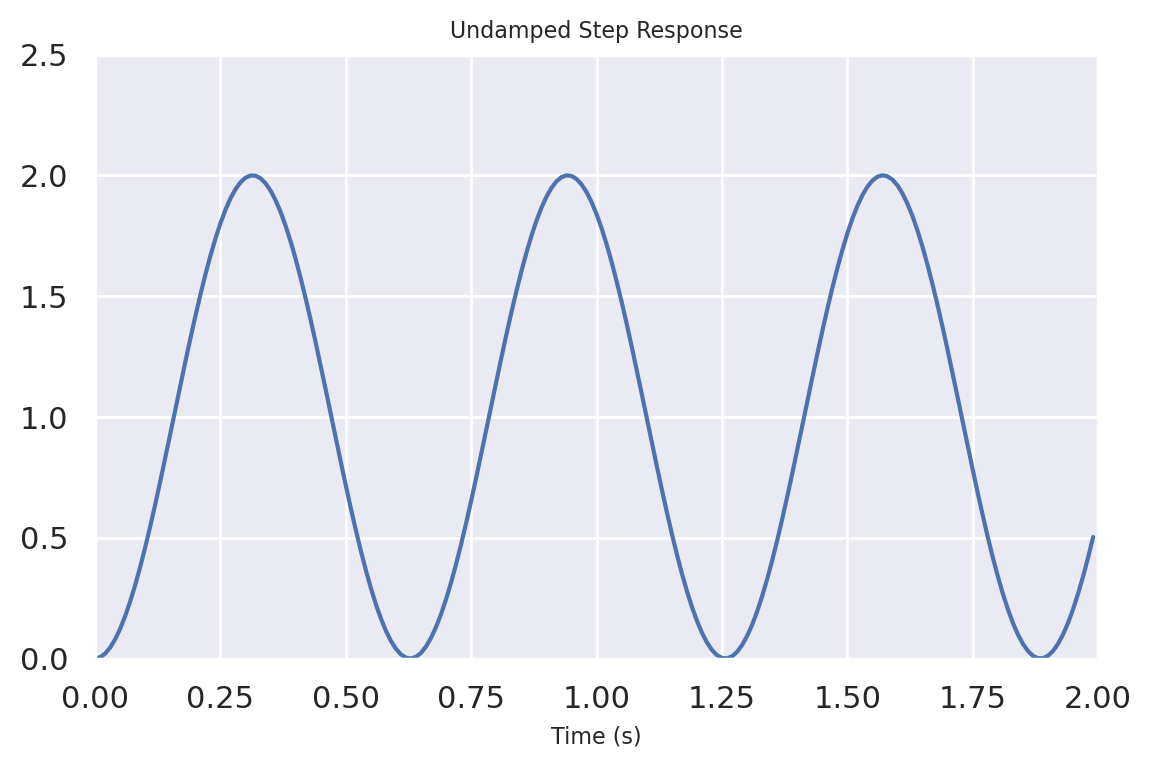

In [54]:
Tf = 2
T, yout = control.step_response(sys=G4, T=np.arange(0, Tf, 0.01))
plt.plot(T, yout)
plt.xlabel("Time (s)")
plt.title("Undamped Step Response")
plt.axis([0, Tf, 0, 2.5])
plt.grid("on")

**Bode Plot** 

Show the Bode Magnitude and Phase Plots for all damping conditions of a second order system below:

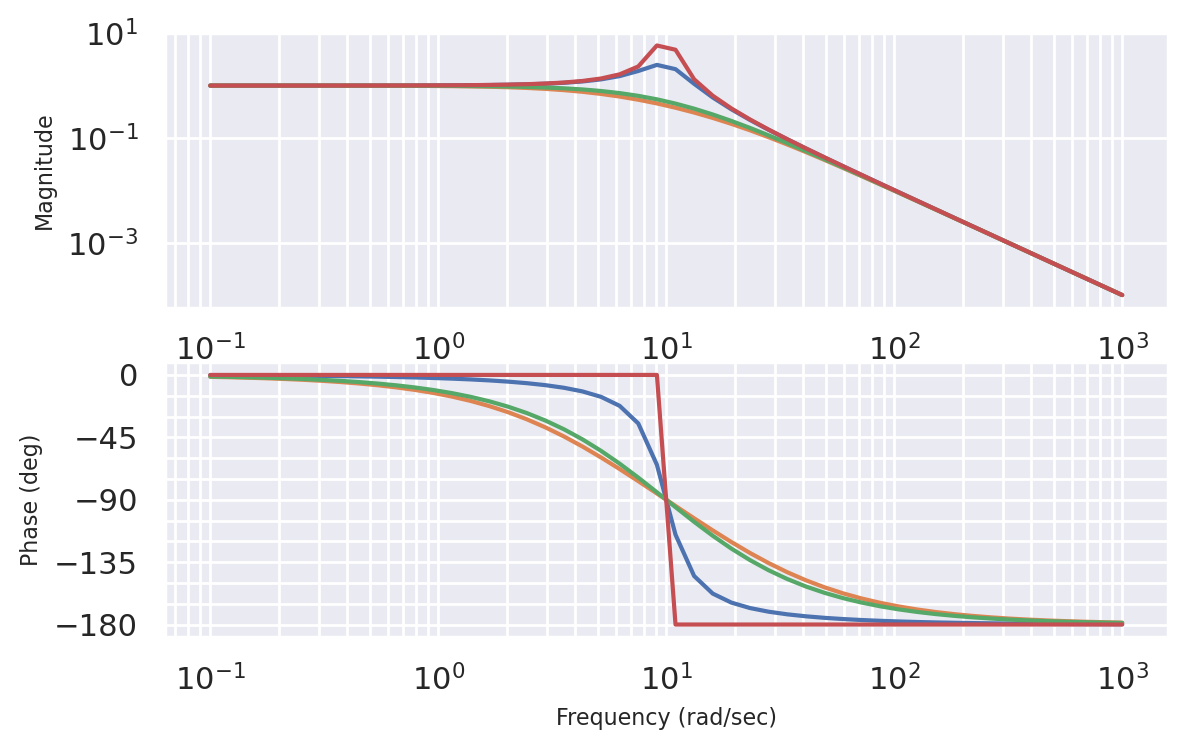

In [53]:
mag, phase, omega = control.bode([G1, G2, G3, G4], plot=True)